In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2
from os.path import join
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/WP/")

In [ ]:
!ls

WP-L.csv  WP-Liste.csv


In [ ]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file = 'WP-L.csv'
df = pd.read_csv(file, sep=';')

In [ ]:
df.head()

,Hersteller_name,Hersteller_typ_typ,Hersteller_typ_A2,Hersteller_typ_A7,Hersteller_typ_ErP,Hersteller_typ_Tag,Hersteller_typ_Nacht
0,alpha innotec c/o ait-Schweiz AG,"alpha innotec, KHZ-LW 60 400",6.2,4.7,47.0,47.0,47.0
1,alpha innotec c/o ait-Schweiz AG,"alpha innotec, KHZ-LW 80 400",8.0,6.1,47.0,47.0,47.0
2,alpha innotec c/o ait-Schweiz AG,"alpha innotec, KHZ-LW60 300",6.2,4.7,47.0,47.0,47.0
3,alpha innotec c/o ait-Schweiz AG,"alpha innotec, L12 Split",8.3,7.5,58.0,65.5,61.0
4,alpha innotec c/o ait-Schweiz AG,"alpha innotec, L16 Split",10.8,10.1,58.0,71.5,67.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hersteller_name       635 non-null    object 
 1   Hersteller_typ_typ    635 non-null    object 
 2   Hersteller_typ_A2     634 non-null    float64
 3   Hersteller_typ_A7     634 non-null    float64
 4   Hersteller_typ_ErP    634 non-null    float64
 5   Hersteller_typ_Tag    634 non-null    float64
 6   Hersteller_typ_Nacht  634 non-null    float64
dtypes: float64(5), object(2)
memory usage: 34.9+ KB


In [ ]:
df.describe()

,Hersteller_typ_A2,Hersteller_typ_A7,Hersteller_typ_ErP,Hersteller_typ_Tag,Hersteller_typ_Nacht
count,634.000000,634.000000,634.000000,634.000000,634.000000
mean,13.119046,11.717678,55.700126,59.854259,56.767035
std,10.476820,8.097712,11.522556,6.783647,6.815096
min,2.485000,2.590000,4.000000,42.000000,32.000000
25%,7.100000,6.600000,53.000000,55.000000,53.000000
50%,9.500000,9.720000,57.000000,60.000000,56.000000
75%,14.700000,13.207500,62.000000,65.000000,61.000000
max,75.200000,59.200000,78.000000,81.700000,81.700000


In [ ]:
gb_hersteller = df.groupby(by=['Hersteller_name'])

In [ ]:
# Tableau 23 Colors
tableau23 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (174, 193, 141), (23, 190, 207), (158, 218, 229),
             (255,239,213), (105,105,105), (248,248,255)]
             

# Rescale to values between 0 and 1 
for i in range(len(tableau23)):  
    r, g, b = tableau23[i]  
    tableau23[i] = (r / 255., g / 255., b / 255.)

In [ ]:
df.replace('_', 'ae', regex=True, inplace=True)

In [ ]:
df.replace('Ìa', 'u', regex=True, inplace=True)

In [ ]:
hersteller = df['Hersteller_name']
typ = df['Hersteller_typ_typ']
a2 = df['Hersteller_typ_A2']
a7 = df['Hersteller_typ_A7']
erp = df['Hersteller_typ_ErP']
tag = df['Hersteller_typ_Tag']
nacht = df['Hersteller_typ_Nacht']

In [ ]:
hersteller.unique()

array(['alpha innotec c/o ait-Schweiz AG', 'Atlantic Suisse AG',
       'Buderus Heiztechnik AG', 'Clim Diffusion SA', 'CTA AG',
       'CTC-Giersch', 'Domotec', 'Elcotherm AG', 'Heim AG Heizsysteme',
       'Hoval AG', 'Kibernetik AG', 'Krueger+Co.AG', 'Meier Tobler AG',
       'Nibe Waermetechnik c/o ait-Schweiz AG',
       'Ochsner Waermepumpen GmbH', 'Soltop Schuppisser AG',
       'Stiebel Eltron AG', 'Striega-Therm AG', 'Swisstherm AG',
       'TCA Thermoclima AG', 'Vaillant GmbH', 'Viessmann (Schweiz) AG',
       'Weishaupt AG'], dtype=object)

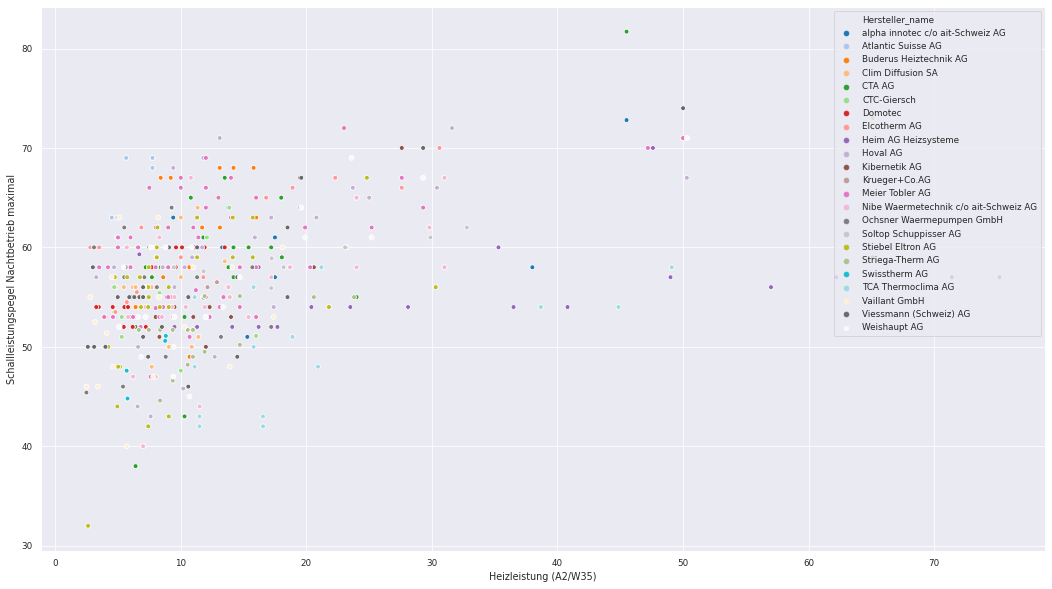

In [ ]:
sns.set()
sns.set_context("paper")
plt.figure(figsize=(18, 10))
ax=sns.scatterplot("Hersteller_typ_A2", "Hersteller_typ_Nacht", data=df, hue="Hersteller_name", palette=tableau23)
ax.set(xlabel='Heizleistung (A2/W35)', ylabel='Schallleistungspegel Nachtbetrieb maximal')
plt.legend(loc='upper right')

[Text(0, 0.5, 'Schallleistungspegel Nachtbetrieb maximal'),
 Text(0.5, 0, 'Heizleistung (A-7/W35)')]

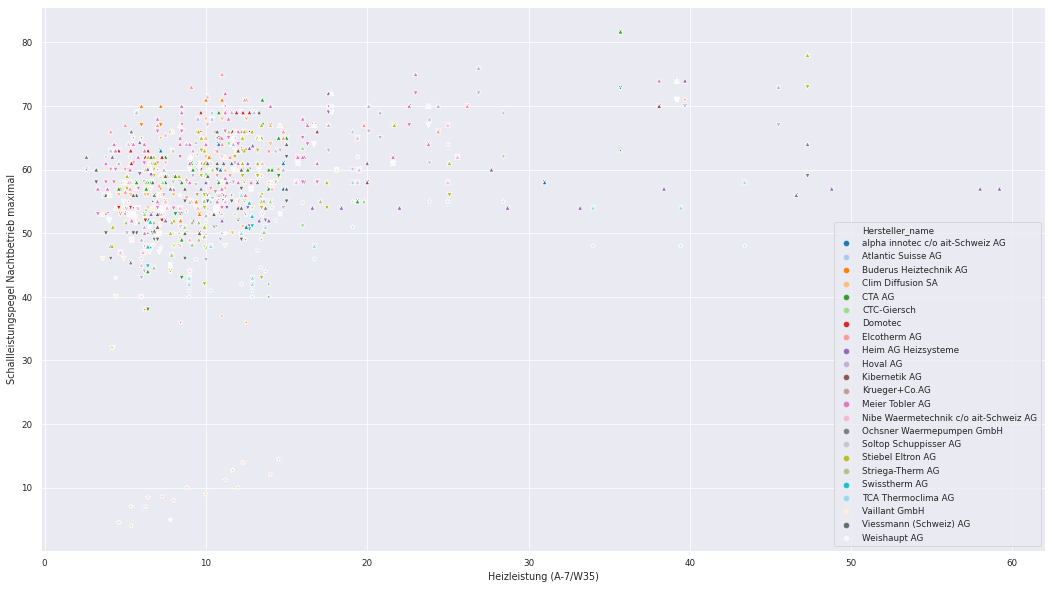

In [ ]:
plt.figure(figsize=(18, 10))
ax=sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_Nacht", data=df, hue="Hersteller_name", palette=tableau23, marker="v", markers=True)
ax=sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_ErP", data=df, hue="Hersteller_name", palette=tableau23, marker="*", markers=True, legend=False)
ax=sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_Tag", data=df, hue="Hersteller_name", palette=tableau23, marker="^", markers=True, legend=False)
ax.set(xlabel='Heizleistung (A-7/W35)', ylabel='Schallleistungspegel Nachtbetrieb maximal')

In [ ]:
df['ratio'] = nacht/a7

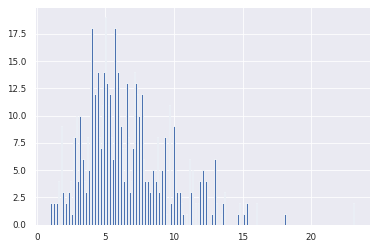

In [ ]:
df['ratio'].hist(bins=200)

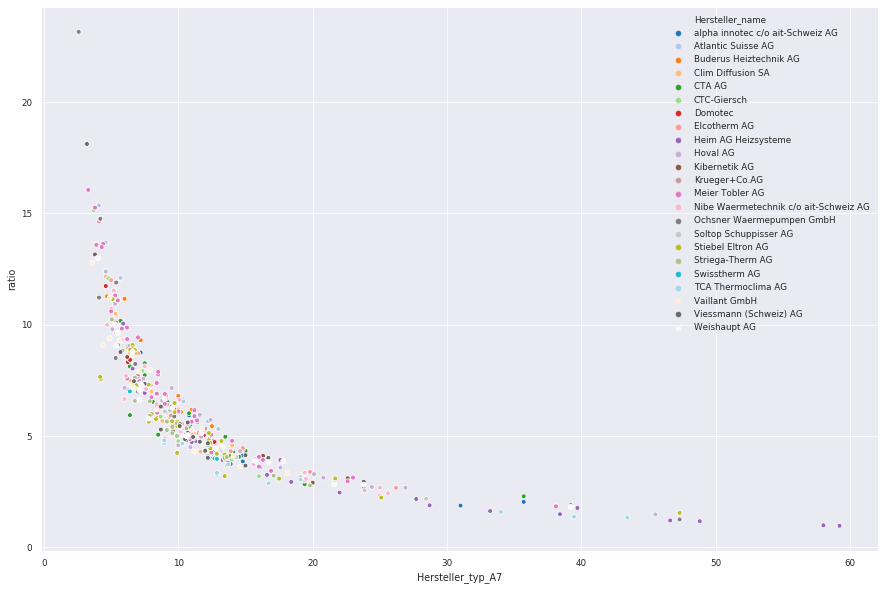

In [ ]:
plt.figure(figsize=(15, 10))
ax=sns.scatterplot('Hersteller_typ_A7', 'ratio', data=df, hue="Hersteller_name", palette=tableau23, markers=True)

[None]

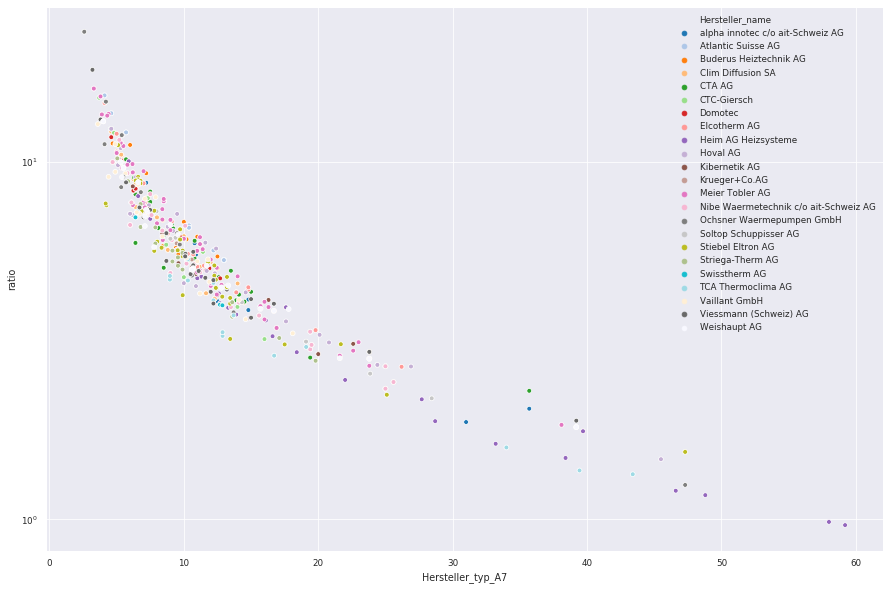

In [ ]:
plt.figure(figsize=(15, 10))
ax=sns.scatterplot('Hersteller_typ_A7', 'ratio', data=df, hue="Hersteller_name", palette=tableau23, markers=True)
ax.set(yscale="log")

In [ ]:
hGroups = df.groupby('Hersteller_name')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


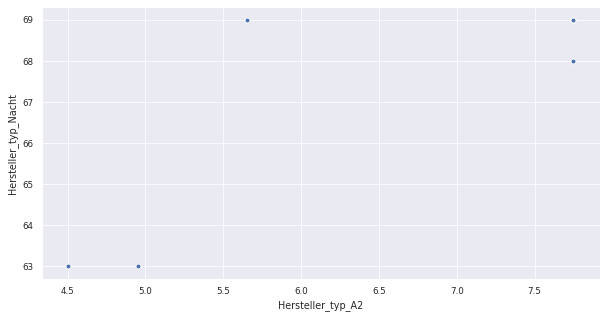

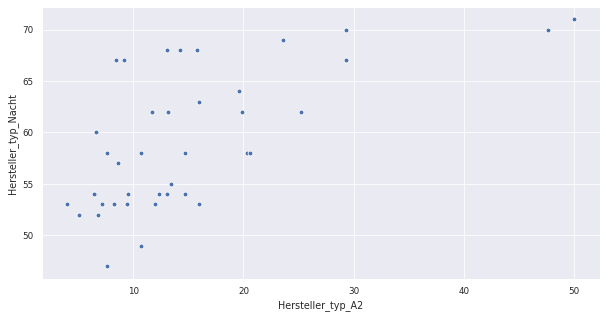

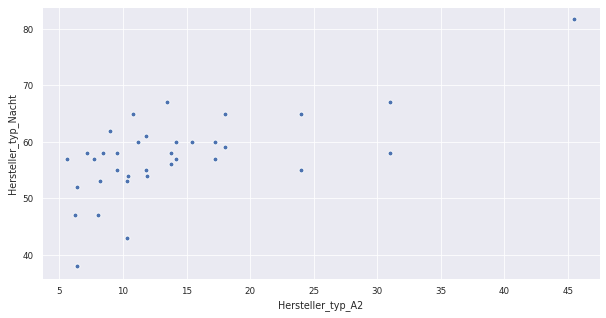

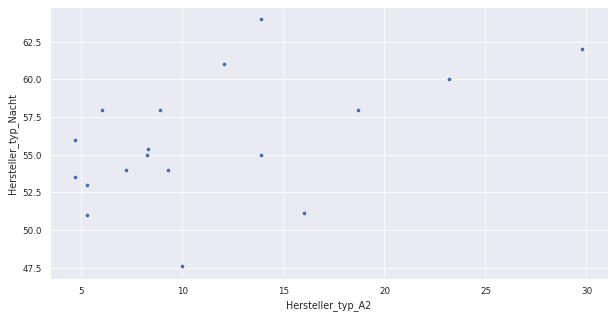

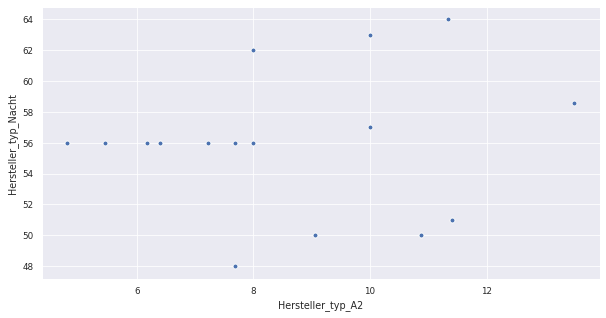

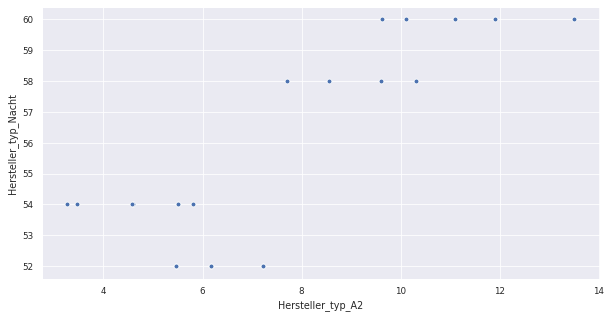

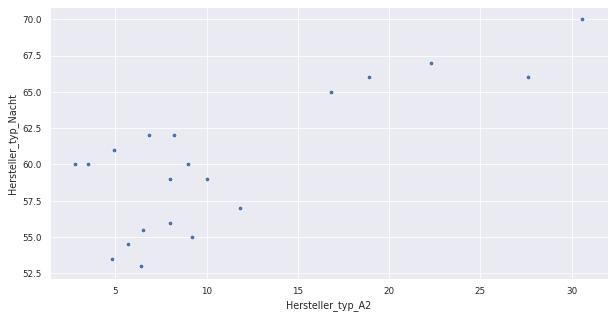

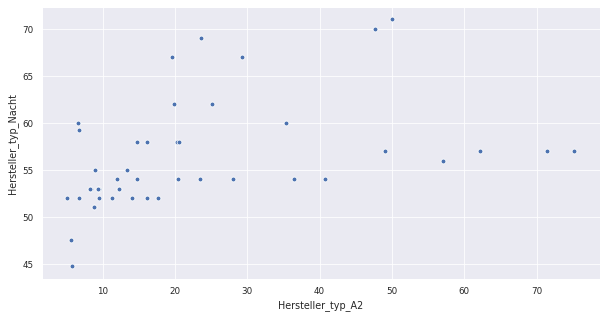

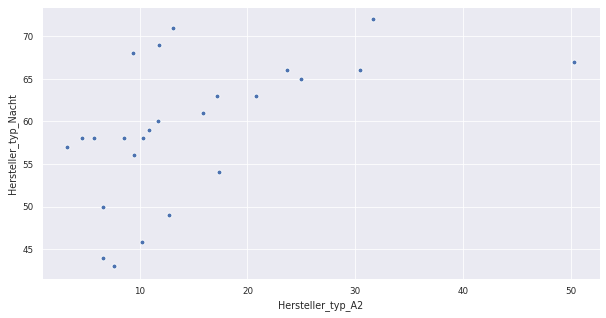

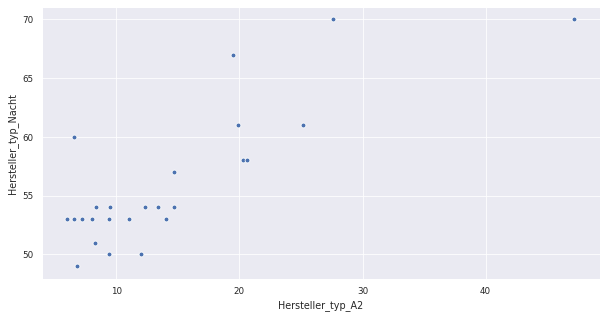

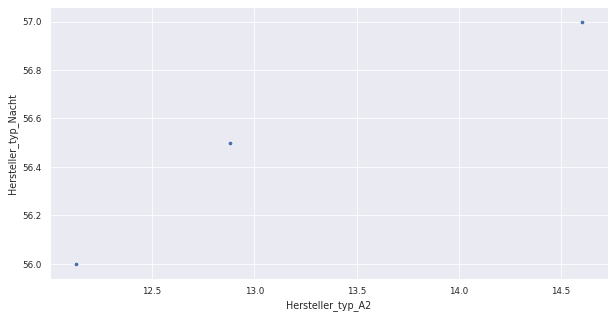

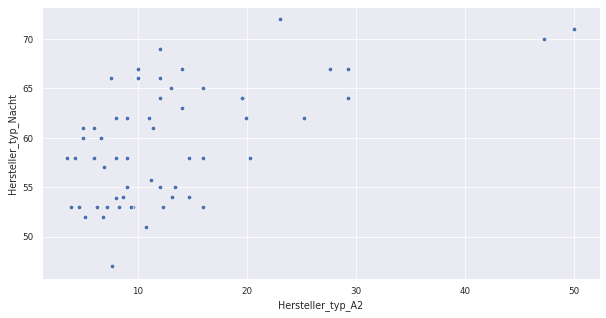

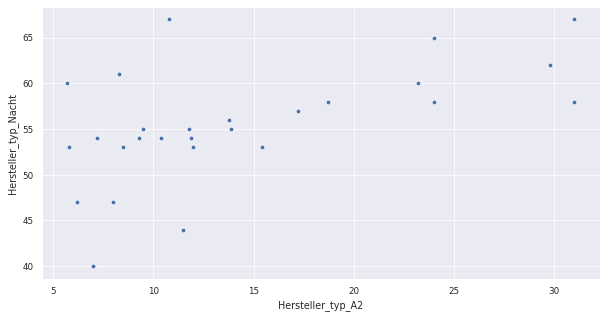

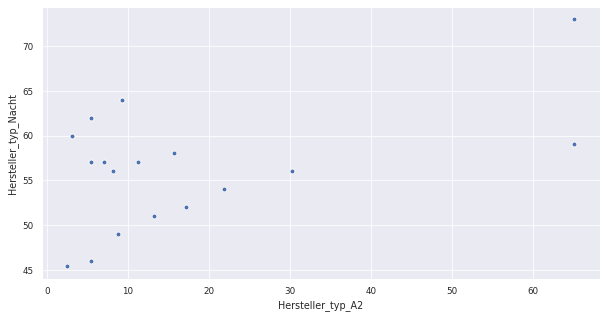

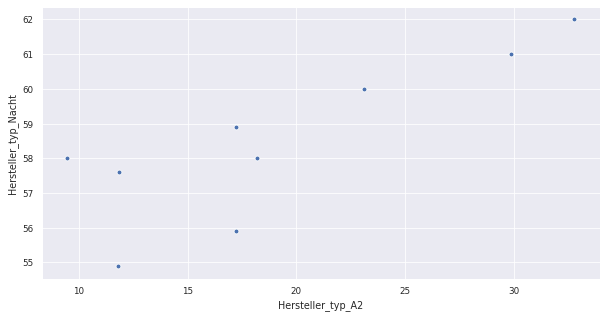

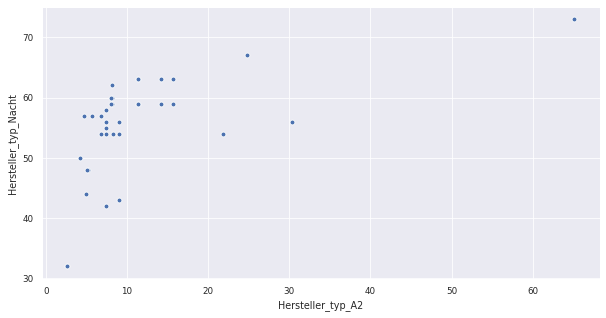

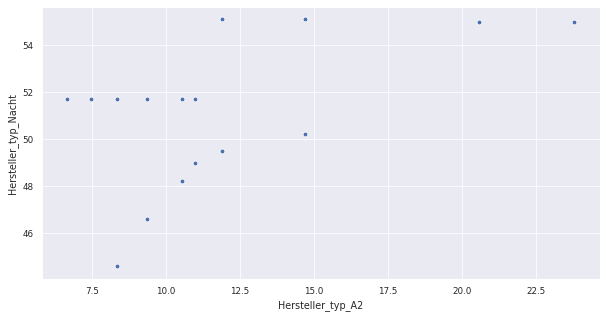

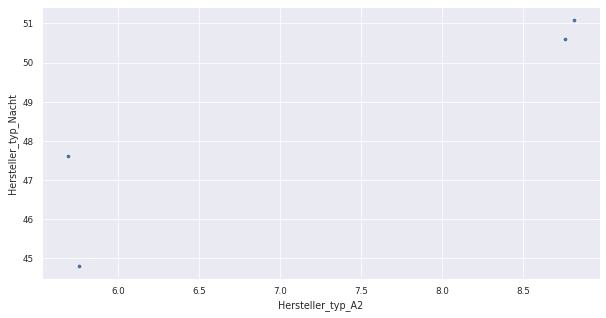

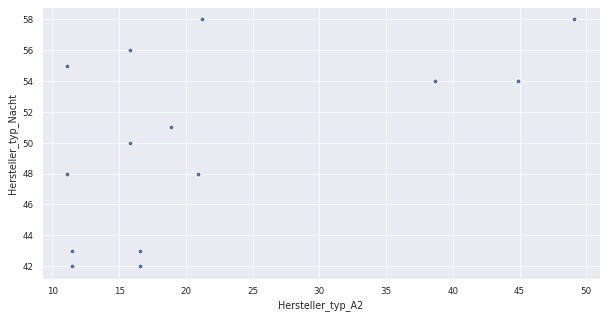

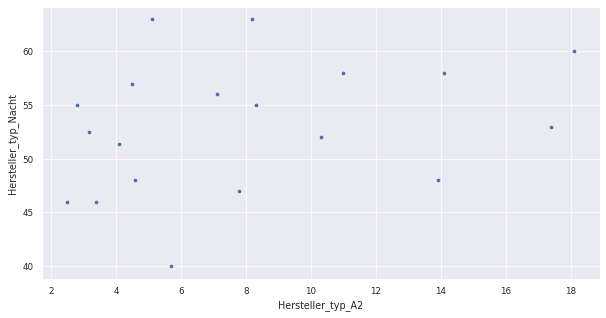

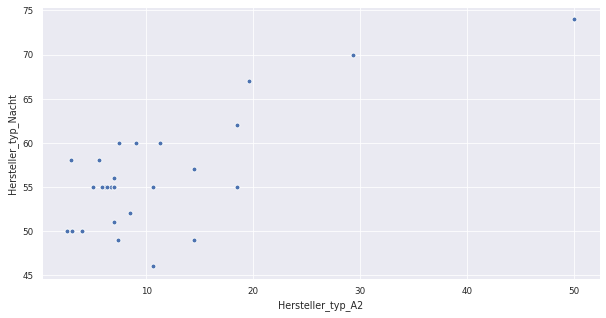

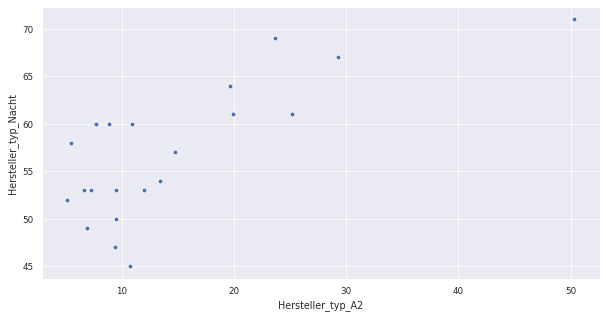

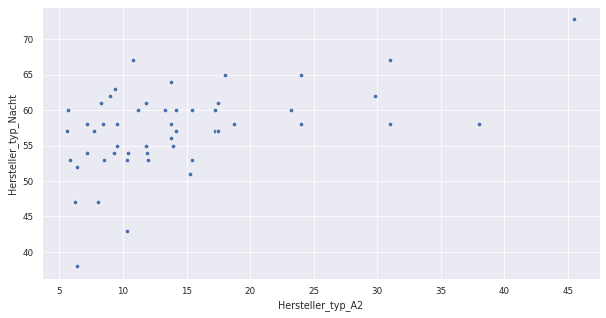

In [ ]:
plots = []
for hName in hGroups.groups.keys():
    plt.figure(figsize=(10, 5))
    plots.append(sns.scatterplot("Hersteller_typ_A2", "Hersteller_typ_Nacht", data=df.loc[df['Hersteller_name'] == hName]))

In [ ]:
hGroups['Hersteller_name'].count()

In [ ]:
len(hGroups)

23

In [ ]:
len(plots)

23

In [ ]:
hersteller.unique()

array(['alpha innotec c/o ait-Schweiz AG', 'Atlantic Suisse AG',
       'Buderus Heiztechnik AG', 'Clim Diffusion SA', 'CTA AG',
       'CTC-Giersch', 'Domotec', 'Elcotherm AG', 'Heim AG Heizsysteme',
       'Hoval AG', 'Kibernetik AG', 'Krueger+Co.AG', 'Meier Tobler AG',
       'Nibe Waermetechnik c/o ait-Schweiz AG',
       'Ochsner Waermepumpen GmbH', 'Soltop Schuppisser AG',
       'Stiebel Eltron AG', 'Striega-Therm AG', 'Swisstherm AG',
       'TCA Thermoclima AG', 'Vaillant GmbH', 'Viessmann (Schweiz) AG',
       'Weishaupt AG'], dtype=object)

In [ ]:
    ax.set_xlabel('Heizleistung (A2/W35)')
    ax.set_ylabel('Schallleistungspegel')

Text(17.199999999999996, 0.5, 'Schallleistungspegel')

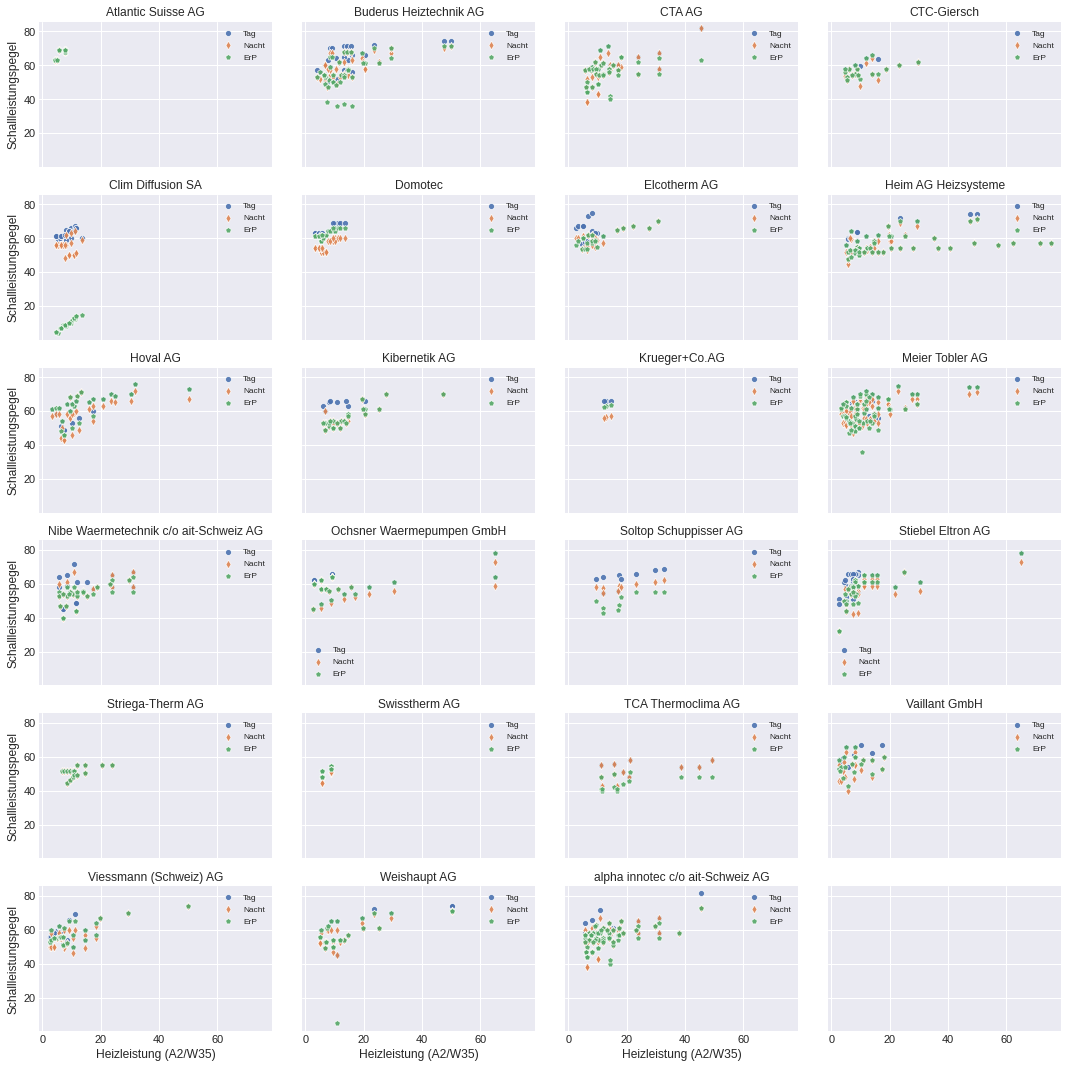

In [ ]:
hGroups = df.groupby('Hersteller_name')
nameList = []
for name, group in hGroups:
    nameList.append(name)

sns.set()
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15,15), sharey=True,sharex=True)
for i, ax in enumerate(axes.flatten()):
    if i == len(hGroups):
        break
    ax.set_title(nameList[i])
    sns.scatterplot("Hersteller_typ_A2", "Hersteller_typ_Tag", data=df.loc[df['Hersteller_name'] == nameList[i]], ax=ax, label='Tag', marker='o', alpha=0.9)
    sns.scatterplot("Hersteller_typ_A2", "Hersteller_typ_Nacht", data=df.loc[df['Hersteller_name'] == nameList[i]], ax=ax, label='Nacht', marker='d', alpha=0.9)
    sns.scatterplot("Hersteller_typ_A2", "Hersteller_typ_ErP", data=df.loc[df['Hersteller_name'] == nameList[i]], ax=ax, label='ErP', marker='p', alpha=0.9)
    ax.set_xlabel('Heizleistung (A2/W35)')
    ax.set_ylabel('Schallleistungspegel')
    ax.legend(fontsize='x-small')
fig.tight_layout()

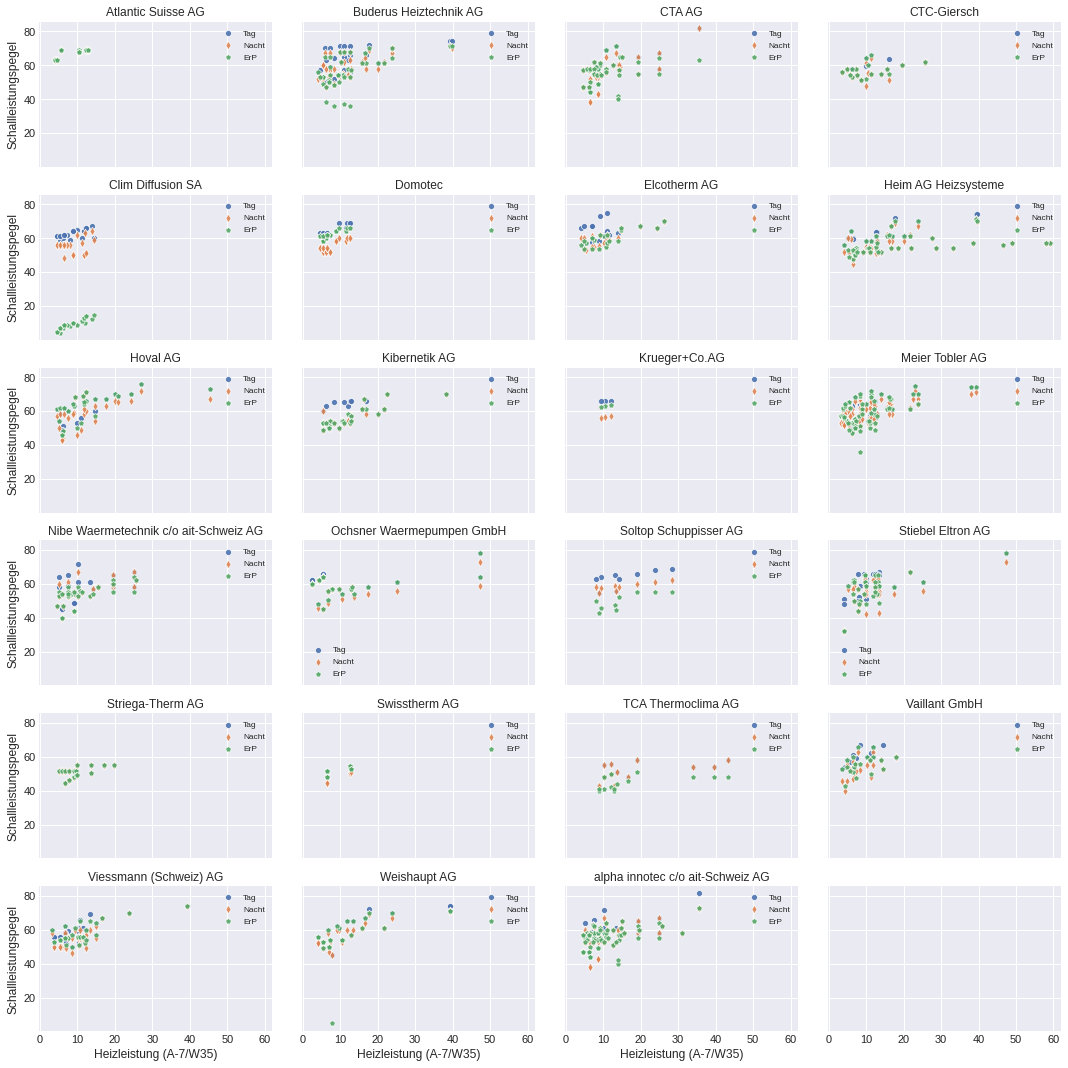

In [ ]:
hGroups = df.groupby('Hersteller_name')
nameList = []
for name, group in hGroups:
    nameList.append(name)

sns.set()
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15,15), sharey=True,sharex=True)
for i, ax in enumerate(axes.flatten()):
    if i == len(hGroups):
        break
    ax.set_title(nameList[i])
    sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_Tag", data=df.loc[df['Hersteller_name'] == nameList[i]], ax=ax, label='Tag', marker='o', alpha=0.9)
    sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_Nacht", data=df.loc[df['Hersteller_name'] == nameList[i]], ax=ax, label='Nacht', marker='d', alpha=0.9)
    sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_ErP", data=df.loc[df['Hersteller_name'] == nameList[i]], ax=ax, label='ErP', marker='p', alpha=0.9)
    ax.set_xlabel('Heizleistung (A-7/W35)')
    ax.set_ylabel('Schallleistungspegel')
    ax.legend(fontsize='x-small')
fig.tight_layout()

In [ ]:
fig.savefig('fig1.png',dpi=300)

In [ ]:
df["Hersteller_typ_A7"].max()

59.2

In [ ]:
import numpy as np
lGroup = df.groupby(pd.cut(df["Hersteller_typ_A7"], np.arange(0, 60, 5))).min()

In [ ]:
lGroup

In [ ]:
lGroup2 = df.groupby(pd.cut(df["Hersteller_typ_A7"], np.arange(0, 60, 5)))["Hersteller_typ_Tag"].nsmallest(3)

In [ ]:
lGroup2.describe()

# Bokeh

In [ ]:
# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [ ]:
bfig = figure(plot_width = 600, plot_height = 600, 
           title = 'Wärmepumpen',
           x_axis_label = 'Heizleistung', y_axis_label = 'Schallpegel')

In [ ]:
Leistung_A7 = df['Hersteller_typ_A7']
Leistung_A2 = df['Hersteller_typ_A2']
Pegel_Tag = df['Hersteller_typ_Tag']
Pegel_Nacht = df['Hersteller_typ_Nacht']
Pegel_ErP = df['Hersteller_typ_ErP']

In [ ]:
bfig.square(Leistung_A7, Pegel_Tag, size = 12, color = 'navy', alpha = 0.6)
output_notebook()
show(bfig)

In [ ]:
# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

## also old

In [ ]:
df.loc[df['Hersteller_name'] == 'alpha innotec c/o ait-Schweiz AG']

In [ ]:
type(dindex)

NameError: ignored

In [ ]:
import numpy as np

In [ ]:
for i in hGroups.groups.keys():
    print(i)

In [ ]:
plt.figure(figsize=(18, 10))
ax=sns.scatterplot("Hersteller_typ_A7", "Hersteller_typ_Nacht", data=df, hue="Hersteller_name", palette=tableau23, marker="v", markers=True)
ax.set(xlabel='Heizleistung (A-7/W35)', ylabel='Schallleistungspegel Nachtbetrieb maximal')

In [ ]:
df2 = df.sort_values(by=['ratio'])

In [ ]:
gb_hersteller = df2.groupby(by=['Hersteller_name'])

In [ ]:
mysort = df2.groupby('Hersteller_name')['ratio'].mean().sort_values(axis=0)

In [ ]:
mysort2 = df2.groupby(['Hersteller_name']).agg({'ratio':'mean'}).sort_values(by=['ratio'])

In [ ]:
mysort

In [ ]:
mysort2

In [ ]:
df3 = df.sort_values(['ratio']).groupby('Hersteller_name')

In [ ]:
print(df3)

In [ ]:
plt.figure(figsize=(15, 10))
ax=sns.scatterplot('Hersteller_typ_A7', 'ratio', data=df2, hue="Hersteller_name", , hue_order=mysort2, palette="RdBu_r", markers=True)
ax.set(yscale="log")

In [ ]:
mysort2.rank()

## Old

In [ ]:
her_list = gb_hersteller.count().iloc[:,0]

In [ ]:
her_list

In [ ]:
df['Hersteller_typ_A2'],['Hersteller_typ_Nacht']

In [ ]:
testi = pd.DataFrame(a2, nacht)

In [ ]:
testi

In [ ]:
from plotnine import *
g = ggplot(df, aes(x='a2', y='nacht', color='hersteller')) + geom_point(stat='summary') + labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot + Encircle", 
       caption="Source: midwest") 
print(g)

In [ ]:
g = ggplot(diamonds, aes(x='a2', y='nacht', color='hersteller')) + geom_violin()
print(g)

In [ ]:
hersteller.unique()

In [ ]:
hersteller.unique().tolist()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.scatter(a2, nacht, s=30,
               alpha=0.3, cmap='autumn', c=hersteller.unique(), edgecolors='none')
ax.legend()
ax.grid(True)

plt.show()

In [ ]:
import matplotlib.markers as matmark

In [ ]:
plt.plot([1,2,3], marker=10)

In [ ]:
color = []
symbol = []
j=0
fig, ax = plt.subplots()
for manuf in hersteller.unique():
    ax.scatter(a2, nacht, s=30,
               alpha=0.3, cmap='autumn', c=hersteller.unique(), edgecolors='none')

    color.append(j)
    symbol.append(j)
    j += 1

In [ ]:
test = [x for x in range(len(hersteller.unique()))]

In [ ]:
sns.lmplot("Hersteller_typ_A2", "Hersteller_typ_Nacht", data=df, hue="Hersteller_name", palette=sns.color_palette("muted"), fit_reg=False)

In [ ]:
markerlist = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]

In [ ]:
len(markerlist)

23

In [ ]:
ggplot(aes(x='Hersteller_typ_A2"', y='Hersteller_typ_Nacht', color='Hersteller_name'), data=df) +\
    geom_point() +\
    theme_bw() +\
    xlab("Area") +\
    ylab("Population") +\
    ggtitle("Area vs Population")

In [ ]:
df.Hersteller_name[344]

'Krueger+Co.AG'

In [ ]:
df.Hersteller_name.unique()

array(['alpha innotec c/o ait-Schweiz AG', 'Atlantic Suisse AG',
       'Buderus Heiztechnik AG', 'Clim Diffusion SA', 'CTA AG',
       'CTC-Giersch', 'Domotec', 'Elcotherm AG', 'Heim AG Heizsysteme',
       'Hoval AG', 'Kibernetik AG', 'KrÌ_ger+Co.AG', 'Meier Tobler AG',
       'Nibe W_rmetechnik c/o ait-Schweiz AG', 'Ochsner W_rmepumpen GmbH',
       'Soltop Schuppisser AG', 'Stiebel Eltron AG', 'Striega-Therm AG',
       'Swisstherm AG', 'TCA Thermoclima AG', 'Vaillant GmbH',
       'Viessmann (Schweiz) AG', 'Weishaupt AG'], dtype=object)

In [ ]:
df.head()

In [ ]:
nacht.describe()

In [ ]:
tableau23